# Desenvolvendo um filtro de moderação de conteúdo com Python e IA

In [87]:
import os

os.environ["TWITTER_CONSUMER_KEY"] = "HIDDEN"
os.environ["TWITTER_CONSUMER_SECRET"] = "HIDDEN"

os.environ["OPEN_API_KEY"] = "HIDDEN"

## Passo 1: Consumir Tweets (**E**xtract)

In [88]:
tweets = [
    "Java é vida, delicinha demais!",
    "O código do @falvojr é porco demais, pelo amor de Deus! Brinks ;)",
    "Chorando sangue aqui pra aprender Kotlin, mas vou conseguir :D",
    "Se amar é crime, então eu sou traficante!",
    "Netão, ladrão! Roubou meu coração <3",
    "A voz do João é muito sensual, parabéns!",
    "Se @falvojr é programador, eu sou astronauta.", # a clássica do futebol kk
]

## Passo 2: Moderar Tweets (**T**ransform)

In [89]:
# %pip install pysentimiento

### Tasks

- Sentiment = sentiment
- Emotion = emotion
- Hate Speech = hate_speech
- Irony = irony

In [90]:
from pysentimiento import create_analyzer

analyzer = create_analyzer(task="hate_speech", lang="pt")

def moderate_text(text):
    moderation = analyzer.predict(text)
    flagged = moderation.output == 'NEG' if isinstance(moderation.output, str) else len(moderation.output)
    return {
        "flagged": flagged,
        "categories": moderation.probas
    }

## Moderar / Transformar Tweets

In [91]:
moderated_tweets = []
for tweet in tweets:
  moderation = moderate_text(tweet)
  moderated_tweets.append({
      "text": tweet,
      "moderation": moderation
  })

print(*moderated_tweets, sep="\n")

{'text': 'Java é vida, delicinha demais!', 'moderation': {'flagged': 0, 'categories': {'Sexism': 0.006614838261157274, 'Body': 0.0018896420951932669, 'Racism': 0.0030320726800709963, 'Ideology': 0.0022431518882513046, 'Homophobia': 0.0036706740502268076}}}
{'text': 'O código do @falvojr é porco demais, pelo amor de Deus! Brinks ;)', 'moderation': {'flagged': 0, 'categories': {'Sexism': 0.005629290826618671, 'Body': 0.0018805391155183315, 'Racism': 0.003242418635636568, 'Ideology': 0.001985570415854454, 'Homophobia': 0.00426437146961689}}}
{'text': 'Chorando sangue aqui pra aprender Kotlin, mas vou conseguir :D', 'moderation': {'flagged': 0, 'categories': {'Sexism': 0.004081881605088711, 'Body': 0.0016914070583879948, 'Racism': 0.0036314274184405804, 'Ideology': 0.002016898477450013, 'Homophobia': 0.006748641841113567}}}
{'text': 'Se amar é crime, então eu sou traficante!', 'moderation': {'flagged': 0, 'categories': {'Sexism': 0.007734132464975119, 'Body': 0.0013701589778065681, 'Racism

## Passo 3: Visualizar Dados (**L**oad)

In [92]:
# %pip install matplotlib

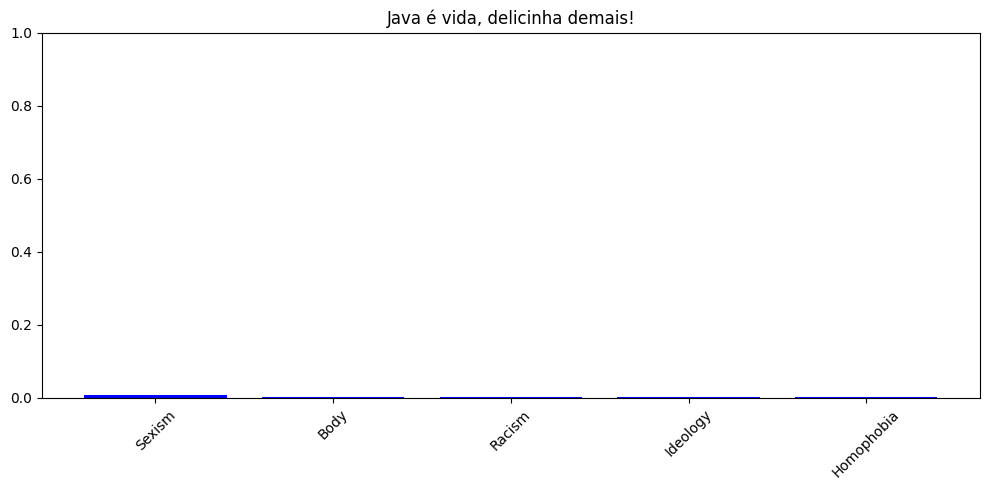

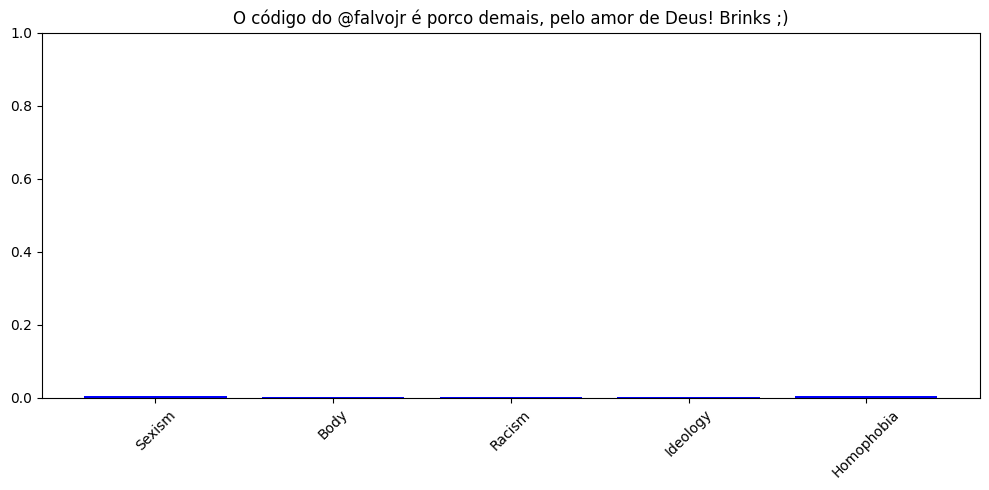

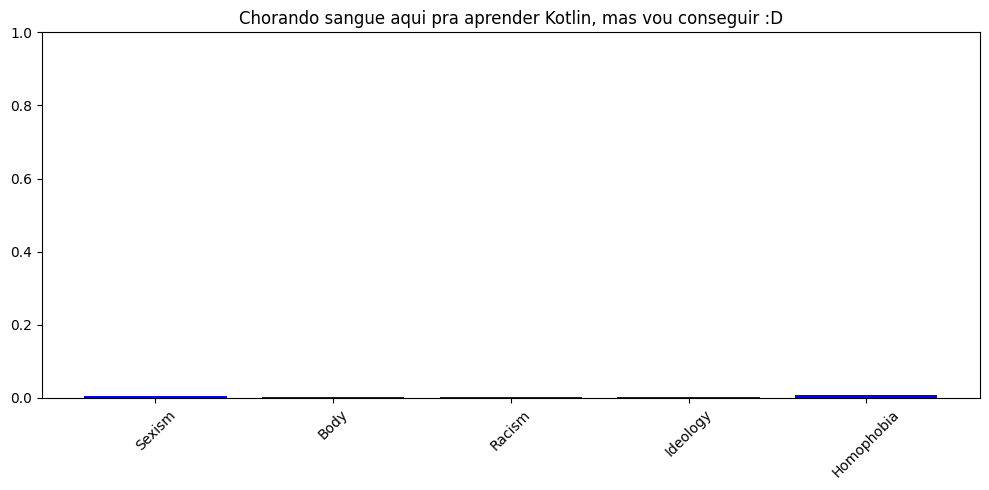

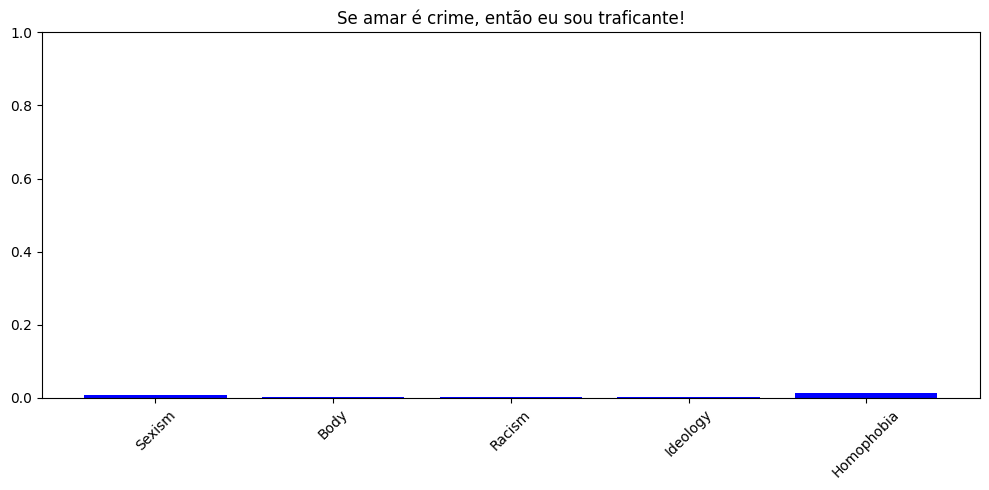

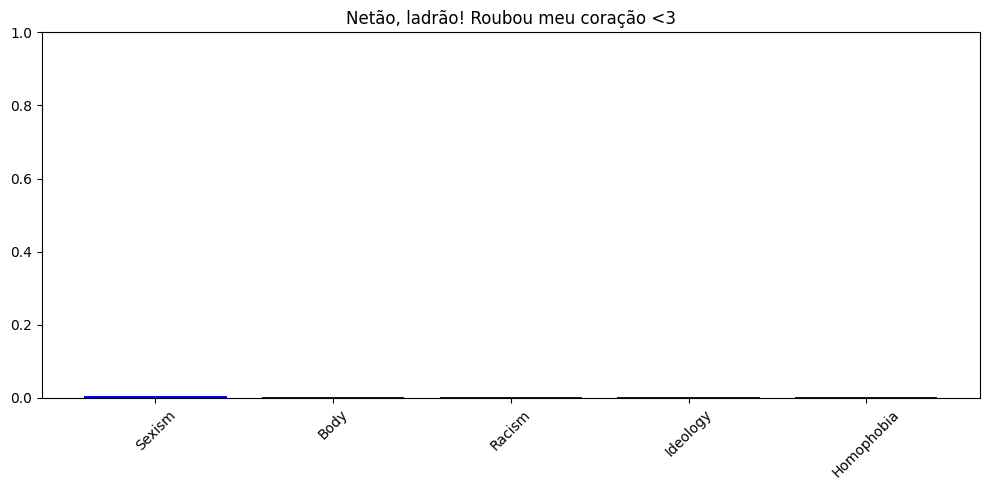

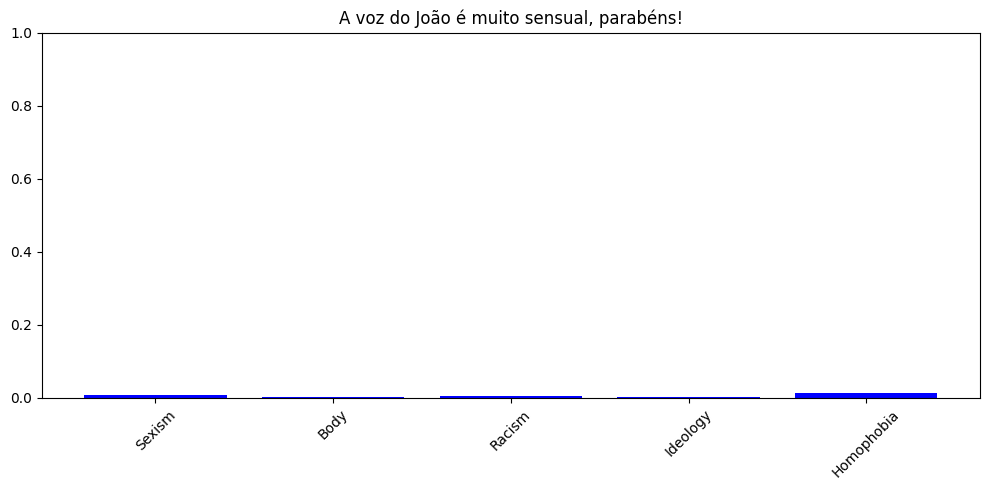

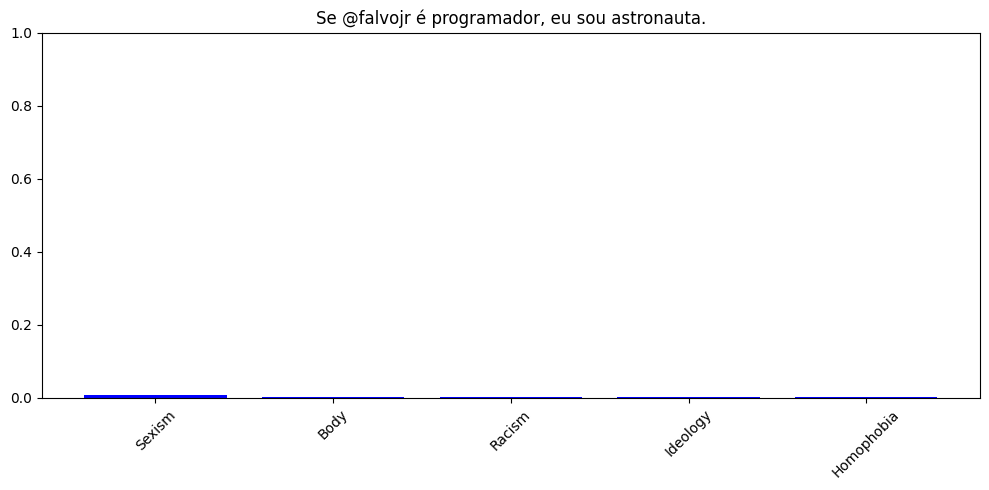

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

for i, tweet in enumerate(moderated_tweets):
    categories = tweet['moderation']['categories']
    flagged = tweet['moderation']['flagged']

    plt.figure(figsize=(10, 5))
    bars = plt.bar(categories.keys(), categories.values(), color='red' if flagged else 'blue')

    plt.title(tweet["text"])
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()

    plt.show()